# TP 03 Appriori 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df=pd.read_csv('../../Databases/diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
df.shape

(768, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


<Axes: >

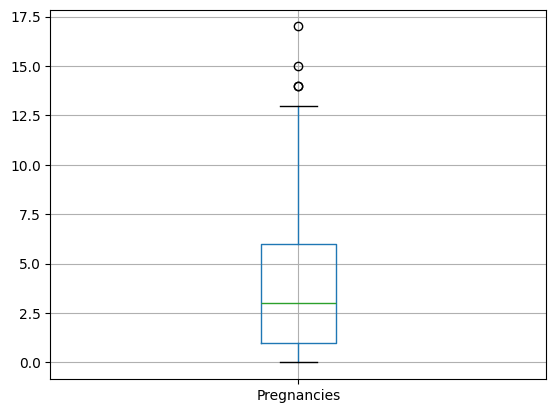

In [7]:
df.boxplot(column='Pregnancies')


In [8]:
df['Pregnancies'].value_counts(ascending=False)

Pregnancies
1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
17      1
15      1
Name: count, dtype: int64

In [9]:
df['Glucose'].value_counts(ascending=False)

Glucose
99     17
100    17
111    14
125    14
129    14
       ..
56      1
169     1
149     1
65      1
190     1
Name: count, Length: 136, dtype: int64

In [10]:
df['BloodPressure'].value_counts(ascending=False)

BloodPressure
70     57
74     52
78     45
68     45
72     44
64     43
80     40
76     39
60     37
0      35
62     34
66     30
82     30
88     25
84     23
90     22
86     21
58     21
50     13
56     12
54     11
52     11
92      8
75      8
65      7
85      6
94      6
48      5
44      4
96      4
110     3
106     3
100     3
98      3
30      2
46      2
55      2
104     2
108     2
40      1
122     1
95      1
102     1
61      1
24      1
38      1
114     1
Name: count, dtype: int64

In [11]:
df['BMI'].value_counts(ascending=False)

BMI
32.0    13
31.6    12
31.2    12
0.0     11
32.4    10
        ..
49.6     1
24.1     1
41.2     1
49.3     1
46.3     1
Name: count, Length: 248, dtype: int64

In [12]:
df.eq(0).sum()


Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [13]:
m=df['Glucose'].mean()

In [14]:
int(m)

120

In [15]:
for i in df['Glucose']:
    if i==0:
        df['Glucose'].replace(0,int(m),inplace=True)
        break   

C:\Users\nourg\AppData\Local\Temp\ipykernel_2284\3662678415.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Glucose'].replace(0,int(m),inplace=True)


In [16]:
m=df['BloodPressure'].mean()

for i in df['BloodPressure']:
    if i==0:
        df['BloodPressure'].replace(0,int(m),inplace=True)
        break   

C:\Users\nourg\AppData\Local\Temp\ipykernel_2284\1953799899.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['BloodPressure'].replace(0,int(m),inplace=True)


In [17]:
m=df['BMI'].mean()

for i in df['BMI']:
    if i==0:
        df['BMI'].replace(0,int(m),inplace=True)
        break   

C:\Users\nourg\AppData\Local\Temp\ipykernel_2284\1084722041.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['BMI'].replace(0,int(m),inplace=True)


In [18]:
df.eq(0).sum()

Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness               227
Insulin                     374
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [19]:
df['Age'].value_counts(ascending=False)

Age
22    72
21    63
25    48
24    46
23    38
28    35
26    33
27    32
29    29
31    24
41    22
30    21
37    19
42    18
33    17
36    16
38    16
32    16
45    15
34    14
46    13
40    13
43    13
39    12
35    10
44     8
50     8
51     8
52     8
58     7
54     6
47     6
49     5
60     5
53     5
57     5
48     5
63     4
66     4
55     4
62     4
59     3
56     3
65     3
67     3
61     2
69     2
72     1
81     1
64     1
70     1
68     1
Name: count, dtype: int64

In [20]:
df[df['Age']<21].shape[0]

0

In [21]:
df[df['Age']>90].shape[0]

0

In [22]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,69,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,31.0,0.232,54,1


In [23]:
preg = df[df['Pregnancies']>5]
print(preg['Age'].value_counts())

Age
41    16
42    13
45    11
43    11
39    10
31     8
36     8
40     8
46     8
38     8
32     7
51     7
34     7
50     7
37     7
29     6
54     5
28     5
49     5
58     5
33     5
57     4
47     4
48     4
44     4
35     3
60     3
55     3
66     3
24     2
30     2
56     2
27     2
52     2
26     2
53     2
61     1
23     1
64     1
67     1
59     1
81     1
62     1
68     1
22     1
63     1
Name: count, dtype: int64


In [24]:
age = df[df['Age']<25]

In [25]:
print(age['Pregnancies'].value_counts())

Pregnancies
1    72
0    55
2    51
3    23
4    13
6     2
7     1
5     1
8     1
Name: count, dtype: int64


<Axes: >

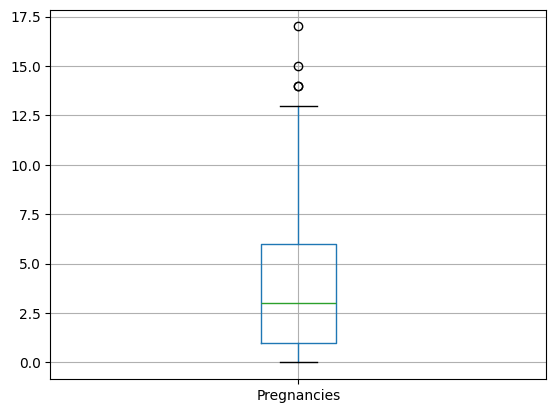

In [26]:
df.boxplot(column='Pregnancies')

<Axes: >

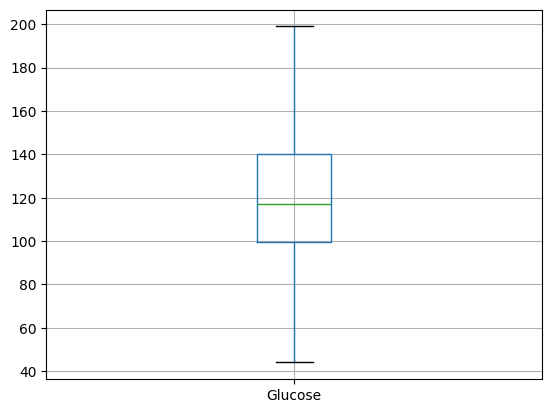

In [27]:
df.boxplot(column='Glucose')

<Axes: >

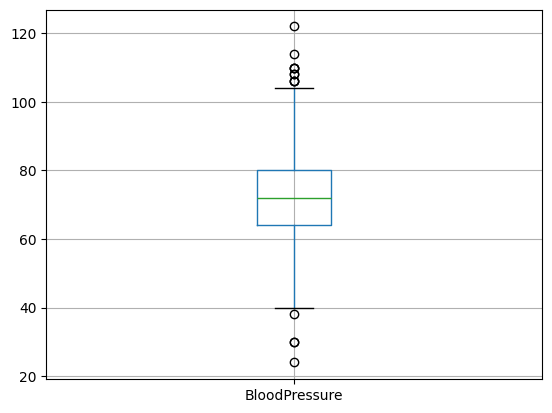

In [28]:
df.boxplot(column='BloodPressure')

<Axes: >

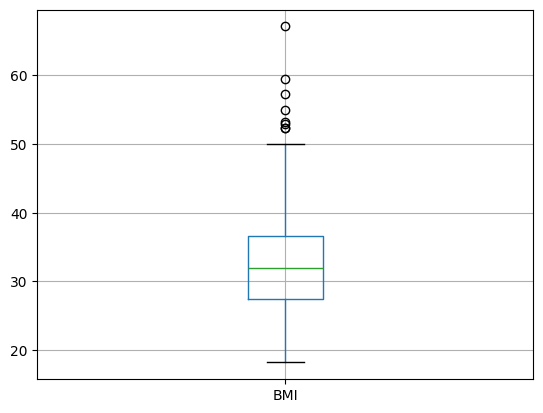

In [29]:
df.boxplot(column='BMI')

<Axes: >

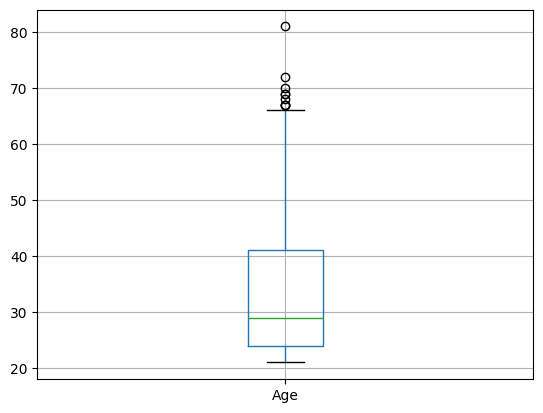

In [30]:
df.boxplot(column='Age')

In [31]:
df = df[df['SkinThickness']<90]


<Axes: >

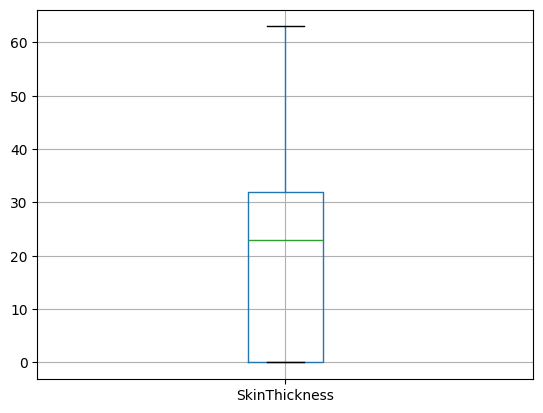

In [32]:
df.boxplot(column='SkinThickness')

<Axes: >

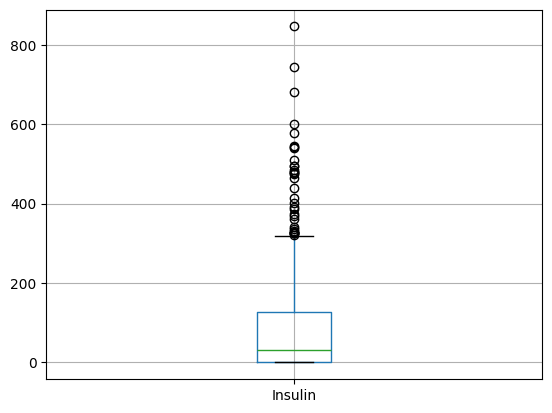

In [33]:
df.boxplot(column='Insulin')

<Axes: >

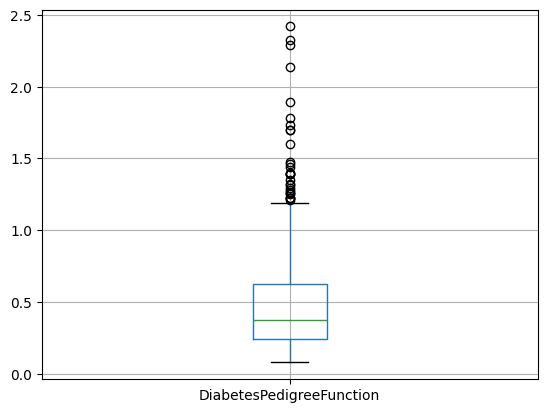

In [34]:
df.boxplot(column='DiabetesPedigreeFunction')

# Algo Appriori

In [35]:
from itertools import combinations

df_bin = pd.DataFrame()
df_bin['Glucose_High'] = df['Glucose'] > 120
df_bin['BMI_High'] = df['BMI'] > 30
df_bin['Age_High'] = df['Age'] > 40
df_bin['Pregnancies_Many'] = df['Pregnancies'] > 5
df_bin['BloodPressure_High'] = df['BloodPressure'] > 80
df_bin['Insulin_High'] = df['Insulin'] > 100
df_bin['SkinThickness_High'] = df['SkinThickness'] > 20
df_bin['DiabetesPedigree_High'] = df['DiabetesPedigreeFunction'] > 0.5
df_bin['Outcome_Positive'] = df['Outcome'] == 1

transactions = df_bin.apply(lambda row: frozenset([col for col in df_bin.columns if row[col]]), axis=1).tolist()

In [36]:
def get_support(itemset, transactions):
    return sum(1 for transaction in transactions if itemset.issubset(transaction)) / len(transactions)

In [37]:
def generate_candidates(frequent_itemsets, k):
    candidates = set()
    itemsets = list(frequent_itemsets)
    for i in range(len(itemsets)):
        for j in range(i+1, len(itemsets)):
            union = itemsets[i] | itemsets[j]
            if len(union) == k:
                candidates.add(union)
    return candidates

In [38]:
def apriori(transactions, min_support=0.1):
    item_counts = {}
    for transaction in transactions:
        for item in transaction:
            itemset = frozenset([item])
            item_counts[itemset] = item_counts.get(itemset, 0) + 1
    n_transactions = len(transactions)
    
    # Niveau 1
    frequent_itemsets = {itemset for itemset, count in item_counts.items() if count / n_transactions >= min_support}
    support_data = {itemset: count / n_transactions for itemset, count in item_counts.items() if itemset in frequent_itemsets}
    
    all_frequent_itemsets = frequent_itemsets.copy()
    k = 2
    current_frequent = frequent_itemsets
    
    while current_frequent:
        candidates = generate_candidates(current_frequent, k)
        item_counts = {}
        for transaction in transactions:
            for candidate in candidates:
                if candidate.issubset(transaction):
                    item_counts[candidate] = item_counts.get(candidate, 0) + 1
        current_frequent = {itemset for itemset, count in item_counts.items() if count / n_transactions >= min_support}
        support_data.update({itemset: count / n_transactions for itemset, count in item_counts.items() if itemset in current_frequent})
        all_frequent_itemsets |= current_frequent
        k += 1

    return all_frequent_itemsets, support_data


In [39]:
frequent_itemsets, support_data = apriori(transactions, min_support=0.1)

In [40]:
frequent_itemsets

{frozenset({'BMI_High', 'DiabetesPedigree_High', 'SkinThickness_High'}),
 frozenset({'BMI_High', 'Glucose_High', 'Insulin_High'}),
 frozenset({'DiabetesPedigree_High', 'SkinThickness_High'}),
 frozenset({'BMI_High', 'SkinThickness_High'}),
 frozenset({'BloodPressure_High', 'Outcome_Positive'}),
 frozenset({'BMI_High', 'DiabetesPedigree_High', 'Glucose_High'}),
 frozenset({'Glucose_High', 'Pregnancies_Many'}),
 frozenset({'Insulin_High'}),
 frozenset({'Glucose_High',
            'Insulin_High',
            'Outcome_Positive',
            'SkinThickness_High'}),
 frozenset({'BMI_High', 'Insulin_High'}),
 frozenset({'DiabetesPedigree_High',
            'Outcome_Positive',
            'SkinThickness_High'}),
 frozenset({'Glucose_High', 'Outcome_Positive'}),
 frozenset({'Pregnancies_Many'}),
 frozenset({'Outcome_Positive', 'SkinThickness_High'}),
 frozenset({'Insulin_High', 'Outcome_Positive', 'SkinThickness_High'}),
 frozenset({'BMI_High', 'Outcome_Positive', 'SkinThickness_High'}),
 froze

In [41]:
def generate_rules(frequent_itemsets, support_data, min_confidence=0.7):
    rules = []
    for itemset in frequent_itemsets:
        if len(itemset) >= 2:
            for i in range(1, len(itemset)):
                for antecedent in combinations(itemset, i):
                    antecedent = frozenset(antecedent)
                    consequent = itemset - antecedent
                    if consequent:
                        confidence = support_data[itemset] / support_data.get(antecedent, 1)
                        if confidence >= min_confidence:
                            rules.append((antecedent, consequent, support_data[itemset], confidence))
    return rules

In [42]:
rules = generate_rules(frequent_itemsets, support_data)

In [43]:
rules

[(frozenset({'DiabetesPedigree_High', 'SkinThickness_High'}),
  frozenset({'BMI_High'}),
  0.17992177314211213,
  0.811764705882353),
 (frozenset({'BMI_High', 'DiabetesPedigree_High'}),
  frozenset({'SkinThickness_High'}),
  0.17992177314211213,
  0.75),
 (frozenset({'BMI_High', 'Insulin_High'}),
  frozenset({'Glucose_High'}),
  0.16558018252933507,
  0.7055555555555555),
 (frozenset({'Glucose_High', 'Insulin_High'}),
  frozenset({'BMI_High'}),
  0.16558018252933507,
  0.7604790419161677),
 (frozenset({'SkinThickness_High'}),
  frozenset({'BMI_High'}),
  0.4198174706649283,
  0.7740384615384616),
 (frozenset({'DiabetesPedigree_High', 'Glucose_High'}),
  frozenset({'BMI_High'}),
  0.1421121251629726,
  0.7785714285714285),
 (frozenset({'Insulin_High', 'Outcome_Positive'}),
  frozenset({'Glucose_High', 'SkinThickness_High'}),
  0.1121251629726206,
  0.7747747747747747),
 (frozenset({'Insulin_High', 'Outcome_Positive', 'SkinThickness_High'}),
  frozenset({'Glucose_High'}),
  0.11212516297

In [44]:
print("Règles extraites :")
for antecedent, consequent, support, confidence in rules:
    print(f"{set(antecedent)} => {set(consequent)} | support: {support:.2f}, confidence: {confidence:.2f}")


Règles extraites :
{'SkinThickness_High', 'DiabetesPedigree_High'} => {'BMI_High'} | support: 0.18, confidence: 0.81
{'BMI_High', 'DiabetesPedigree_High'} => {'SkinThickness_High'} | support: 0.18, confidence: 0.75
{'BMI_High', 'Insulin_High'} => {'Glucose_High'} | support: 0.17, confidence: 0.71
{'Insulin_High', 'Glucose_High'} => {'BMI_High'} | support: 0.17, confidence: 0.76
{'SkinThickness_High'} => {'BMI_High'} | support: 0.42, confidence: 0.77
{'DiabetesPedigree_High', 'Glucose_High'} => {'BMI_High'} | support: 0.14, confidence: 0.78
{'Insulin_High', 'Outcome_Positive'} => {'SkinThickness_High', 'Glucose_High'} | support: 0.11, confidence: 0.77
{'SkinThickness_High', 'Insulin_High', 'Outcome_Positive'} => {'Glucose_High'} | support: 0.11, confidence: 0.85
{'SkinThickness_High', 'Outcome_Positive', 'Glucose_High'} => {'Insulin_High'} | support: 0.11, confidence: 0.74
{'Insulin_High', 'Outcome_Positive', 'Glucose_High'} => {'SkinThickness_High'} | support: 0.11, confidence: 0.91
{'

In [45]:
df_bin = pd.DataFrame()

df_bin['Glucose_High'] = df['Glucose'] > 120
df_bin['BMI_High'] = df['BMI'] > 30
df_bin['Age_High'] = df['Age'] > 40
df_bin['Pregnancies_Many'] = df['Pregnancies'] > 5
df_bin['BloodPressure_High'] = df['BloodPressure'] > 80
df_bin['Insulin_High'] = df['Insulin'] > 100
df_bin['SkinThickness_High'] = df['SkinThickness'] > 20
df_bin['DiabetesPedigree_High'] = df['DiabetesPedigreeFunction'] > 0.5
df_bin['Outcome_Positive'] = df['Outcome'] == 1

In [46]:
from mlxtend.frequent_patterns import apriori, association_rules

frequent_itemsets = apriori(df_bin, min_support=0.1, use_colnames=True)

rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)

print("Règles d'association extraites :")
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])


Règles d'association extraites :
                                          antecedents  \
0                                      (Glucose_High)   
1                                  (Outcome_Positive)   
2                                (BloodPressure_High)   
3                                      (Insulin_High)   
4                                (SkinThickness_High)   
..                                                ...   
67  (SkinThickness_High, Insulin_High, Outcome_Pos...   
68         (BMI_High, Insulin_High, Outcome_Positive)   
69  (SkinThickness_High, Insulin_High, Outcome_Pos...   
70     (Insulin_High, Outcome_Positive, Glucose_High)   
71                   (Insulin_High, Outcome_Positive)   

                                     consequents   support  confidence  \
0                                     (BMI_High)  0.324641    0.715517   
1                                 (Glucose_High)  0.252934    0.726592   
2                                     (BMI_High)  0.165580  

In [47]:
diabetes_rules = rules[rules['consequents'].apply(lambda x: 'Outcome_Positive' in str(x))]

print("\nRègles liées au diabète :")
print(diabetes_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])


Règles liées au diabète :
                                        antecedents         consequents  \
50  (BMI_High, DiabetesPedigree_High, Glucose_High)  (Outcome_Positive)   

     support  confidence      lift  
50  0.102999    0.724771  2.082019  
